In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
from tqdm.auto import tqdm
sys.path.append("../")
import library

C:\Users\cdipt\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\cdipt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\cdipt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\cdipt\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Question 1

In [2]:
matrix,vector = library.io.reader("./input1.txt")
vector = list(map(lambda x: [x], vector))
matrix = library.matrix.matrix(matrix)
vector = library.matrix.matrix(vector)

In [3]:
print(matrix)
print(vector)

 4.0	-1.0	 0.0	-1.0	 0.0	 0.0	
-1.0	 4.0	-1.0	 0.0	-1.0	 0.0	
 0.0	-1.0	 4.0	 0.0	 0.0	-1.0	
-1.0	 0.0	 0.0	 4.0	-1.0	 0.0	
 0.0	-1.0	 0.0	-1.0	 4.0	-1.0	
 0.0	 0.0	-1.0	 0.0	-1.0	 4.0	

 2.0	
 1.0	
 2.0	
 2.0	
 1.0	
 2.0	



In [4]:
# Solving with Gauss Seidel
x = library.linear.gauss_seidel(matrix,vector,G=[0,0,0,0,0,0],precision=1e-6 )
print("The solution is ")
print(x)

The solution is 
 0.9999999100460266	
 0.999999923219481	
 0.9999999672318638	
 0.9999999457079743	
 0.9999999536588574	
 0.9999999802226803	



In [5]:
#Checking for symmetric matrix
print("The matrix is symmetric:",library.linear.cholesky.is_symmetric(matrix))
#solving using LU_decomposition
vector = list(map(lambda x: x[0], vector.matrix))
x,y = library.linear.lu_solver(matrix,vector)
print("Solution-")
print(x)

The matrix is symmetric: True
Solution-
[1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0]


# Question 2

In [6]:
matrix,vector = library.io.reader("./input2.txt")
vector = list(map(lambda x: [x], vector))
matrix = library.matrix.matrix(matrix)
vector = [vector[i][0] for i in range(len(vector))]

In [7]:
print(matrix)
print(vector)

 0.0	 4.0	 2.0	 0.0	 1.0	
 4.0	 0.0	 4.0	 10.0	 1.0	
 2.0	 5.0	 1.0	 3.0	 13.0	
 11.0	 3.0	 0.0	 1.0	 2.0	
 3.0	 2.0	 7.0	 1.0	 0.0	

[20.0, 15.0, 92.0, 51.0, 15.0]


In [8]:
# Solving with Gauss Jordon
X,Y = library.linear.gauss_jordan(matrix,vector)
print("The solution is ")
print(Y)

The solution is 
[2.674602051644853, 3.7118853908737215, -0.05330739299611409, -0.07442518570923085, 5.259073222497346]


In [9]:
# Solving with LU-decomposition
x,y = library.linear.lu_solver(matrix,vector)
print(y)

[2.674602051644853, 3.7118853908737215, -0.05330739299611409, -0.07442518570923085, 5.259073222497346]


# Question 3

In [18]:
matrix,vector = library.io.reader("./input3.txt")
vector = list(map(lambda x: [x], vector))
matrix = library.matrix.matrix(matrix)
vector = [vector[i][0] for i in range(len(vector))]

In [19]:
# Solving with Gauss Jordon
X,Y = library.linear.gauss_jordan(matrix,vector)
print("The solution is ")
print(Y)

The solution is 
[-0.3333309090909091, 0.3333360606060605, 1.000001212121212, -0.6666590909090907, 3.939393939389468e-06, 0.6666687878787878]


In [27]:
# Now solving with conjugate gradient method
matrix,vector = library.io.reader("./input3.txt")
vector = list(map(lambda x: [x], vector))
matrix = np.array(matrix)
vector = np.array([vector[i][0] for i in range(len(vector))])

In [28]:
print(matrix)
print(vector)

[[ 2. -3.  0.  0.  0.  0.]
 [-1.  4. -1.  0. -1.  0.]
 [ 0. -1.  4.  0.  0. -1.]
 [ 0.  0.  0.  2. -3.  0.]
 [ 0. -1.  0. -1.  4. -1.]
 [ 0.  0. -1.  0. -1.  4.]]
[-1.66667  0.66667  3.      -1.33333 -0.33333  1.66667]


In [35]:
def cong_grad(A,b,x0 = None,MAX_CONJ_GRAD_ITERS = 1000,EPS = 1e-6):
    x = x0
    if x is None:
        x = np.zeros_like(b) # The guess
    r = b - np.matmul(A,x)
    p = r
    rsold = np.dot(r,r)
    
    for i in range(MAX_CONJ_GRAD_ITERS):
        Ap = A@p
        alpha = rsold/(np.matmul(p,Ap))
        x = x + alpha*p
        r = r - alpha*Ap
        rsnew = np.dot(r,r)
        if np.sqrt(rsnew)<EPS:
            break
        p = r + (rsnew/rsold)*p
        rsold = rsnew
    return x

In [36]:
print("The solution with Conjugate Gradient method")
x = cong_grad(A = matrix, b = vector)
print(x)

The solution with Conjugate Gradient method
[-3.33331398e-01  3.33335887e-01  1.00000120e+00 -6.66659422e-01
  3.86831595e-06  6.66668798e-01]


In [40]:
Y

[-0.3333309090909091,
 0.3333360606060605,
 1.000001212121212,
 -0.6666590909090907,
 3.939393939389468e-06,
 0.6666687878787878]

In [41]:
matrix

array([[ 2., -3.,  0.,  0.,  0.,  0.],
       [-1.,  4., -1.,  0., -1.,  0.],
       [ 0., -1.,  4.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  2., -3.,  0.],
       [ 0., -1.,  0., -1.,  4., -1.],
       [ 0.,  0., -1.,  0., -1.,  4.]])

In [87]:
matrix,vector = library.io.reader("./input3.txt")
vector = list(map(lambda x: [x], vector))
matrix = np.array(matrix)
vector = np.array([vector[i][0] for i in range(len(vector))])

In [77]:
n = len(vector)
Ai = np.zeros((n,n))
b = np.zeros(n)

In [78]:
b[-1] = 1

In [79]:
b

array([0., 0., 0., 0., 0., 1.])

In [80]:
x0 = np.zeros(n)
x = cong_grad(A=matrix, b = b,x0=x0)

In [75]:
Ai[:,0] = x

In [81]:
x

array([0.16883074, 0.11255403, 0.10822525, 0.25974065, 0.1731603 ,
       0.32034642])

In [90]:
# Now finding the inverse using the conjugate gradient method
n = len(vector)
Ai = np.zeros((n,n))
for i in tqdm(range(n)):
    b = np.zeros(n)
    b[i] = 1
    x0 = np.ones(n)/2
    x = cong_grad(A=matrix, b = b,x0=x0)
    Ai[:,i] = x
print(Ai)

  0%|          | 0/6 [00:00<?, ?it/s]

[[0.95251292 0.87012986 0.25974418 0.19823321 0.41558482 0.16883619]
 [0.29073184 0.58008669 0.1731594  0.13390185 0.27705643 0.1125541 ]
 [0.08182903 0.17316016 0.32034277 0.05199374 0.11255425 0.10822198]
 [0.19823321 0.41558482 0.16883619 0.95251292 0.87012986 0.25974418]
 [0.13390185 0.27705643 0.1125541  0.29073184 0.58008669 0.1731594 ]
 [0.05199374 0.11255425 0.10822198 0.08182903 0.17316016 0.32034277]]


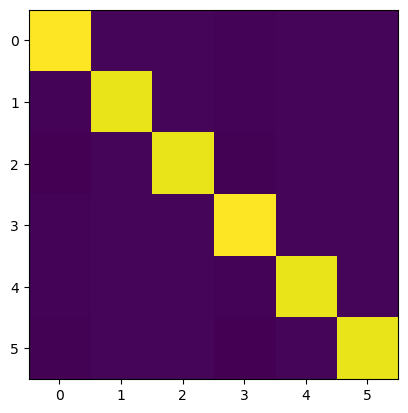

In [92]:
# Verifying the inversion
plt.imshow(matrix@Ai)

#Question 4

In [95]:
#We cannot store the matrix but can certainly store the vectors
def m2v(func,src):
    """
    Considering square matrix for simplicity
    Function to calculate the matrix product between a matrix and vector
    func(x,y): Gives the values of the matrix at the position (x,y)
    """
    n_rows=n_cols=src.shape[0]
    dest = []
    for i in range(n_rows):
        row = np.array(list(func(i,j) for j in range(n_cols)))
        dest.append(np.dot(row,src))
    return np.array(dest)

def delta(x,y):
    if x == y:
        return 1
    else:
        return 0
    
def matrix_gen(x,y):
    m = 0.2
    return (delta(x+1, y) + delta(x-1, y) - 2*delta(x, y))*0.5 + (m**2)* delta(x, y)

def inverse(matrix_gen,SHAPE,MAX_CONJ_GRAD_ITERS = 1000,EPS = 1e-6):
    mat = []
    residue_axis = []
    for index in range(SHAPE):
        b = np.zeros((SHAPE))
        b[index] = 1
        x = np.zeros((SHAPE))
        r = b - m2v(matrix_gen,x)
        if np.sum(np.abs(r))< EPS:
            print("Solution Found !!!")
        p = r.copy()
        r_dot_old = np.dot(r,r)
        res = []
        for k in range(MAX_CONJ_GRAD_ITERS):
            alpha = r_dot_old/(np.dot(p,m2v(matrix_gen,p)))
            x = x + alpha*p
            r = r - alpha*m2v(matrix_gen,p)
            if np.sum(np.abs(r))< EPS:
                mat.append(x[:,None])
                break

            beta = np.dot(r,r)/r_dot_old
            p = r + beta*p    
            r_dot_old = np.dot(r,r)
            res.append(r_dot_old)
        residue_axis.append(res)
    return np.concatenate(mat,axis = -1), residue_axis

In [96]:
SHAPE = 3
MAX_CONJ_GRAD_ITERS = 1000
EPS = 1e-6

In [97]:
m_,res = inverse(matrix_gen,SHAPE=50)

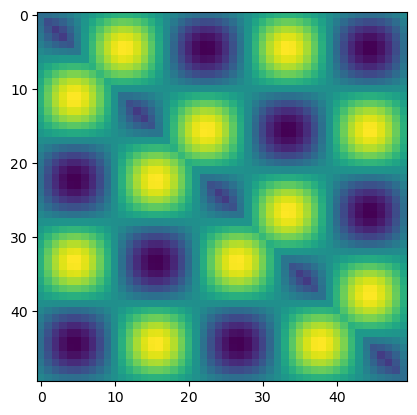

In [98]:
plt.imshow(m_)

Text(0.5, 1.0, 'Residue vs Iterations')

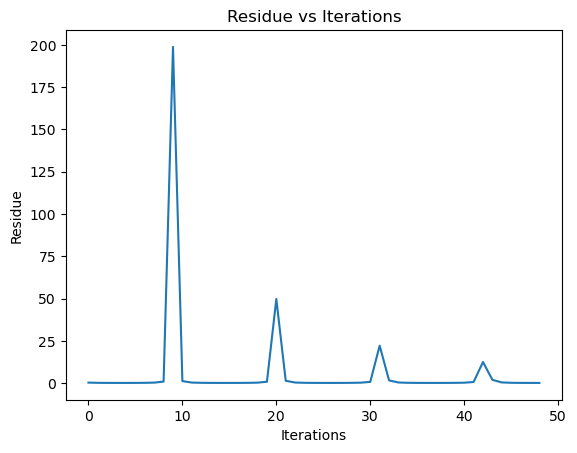

In [102]:
plt.plot(res[0])
plt.xlabel('Iterations')
plt.ylabel('Residue')
plt.title('Residue vs Iterations')